 
<b><span style="color:white; font-size:26px;">Apple Watch and Fitbit data</span></b>

<b><span style="color:white; font-size:18px;">A sample of 46 participants using an apple watch and a fitbit for 65 minutes.</span></b>

In [51]:
import numpy as np 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
! pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 330.3 kB/s eta 0:00:01
   -------- ------------------------------ 61.4/294.9 kB 469.7 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/294.9 kB 853.3 kB/s eta 0:00:01
   ------------------------------------- -- 276.5/294.9 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.2 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\badys\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [11]:
df = pd.read_csv('C:/Users/badys/Documents/kurs/jdszr16-pajtoners/Ula/data_aw_fb.csv')

In [12]:
df.head()

,Unnamed: 0,X1,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
0,1,1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.000000,19.531302,0.138520,1.000000,0.089692,apple watch,Lying
1,2,2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.000000,19.453390,0.137967,1.000000,0.102088,apple watch,Lying
2,3,3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.000000,19.540825,0.138587,1.000000,0.115287,apple watch,Lying
3,4,4,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,59.0,1.000000,19.628260,0.139208,1.000000,0.129286,apple watch,Lying
4,5,5,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,59.0,0.982816,19.715695,0.139828,0.241567,0.144088,apple watch,Lying


In [ ]:
# check overal size of the table
df.shape

(6264, 20)

In [ ]:
# see summary data
df.describe().round(2)

,Unnamed: 0,X1,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance
count,6264.00,6264.00,6264.00,6264.00,6264.00,6264.00,6264.00,6264.00,6264.00,6264.00,6264.00,6264.00,6264.00,6264.00,6264.00,6264.00,6264.00,6264.00
mean,3132.50,1771.14,29.16,0.48,169.71,69.61,109.56,86.14,19.47,13.83,6.03,5.74,65.87,0.31,20.27,0.16,8.11,590.04
std,1808.41,1097.99,8.91,0.50,10.32,13.45,222.80,28.65,27.31,45.94,0.77,1.26,21.20,0.78,28.39,0.21,12.54,4063.84
min,1.00,1.00,18.00,0.00,143.00,43.00,1.00,2.22,0.06,0.00,0.00,0.00,3.00,-1.00,-76.00,-2.71,0.00,0.00
25%,1566.75,789.75,23.00,0.00,160.00,60.00,5.16,75.60,0.74,0.02,6.11,5.91,58.13,-0.47,1.15,0.01,0.26,0.66
50%,3132.50,1720.00,28.00,0.00,168.00,68.00,10.09,77.27,4.00,0.18,6.19,6.16,75.00,0.67,9.82,0.08,2.89,13.37
75%,4698.25,2759.25,33.00,1.00,180.00,77.30,105.85,95.67,20.50,15.70,6.25,6.25,76.14,1.00,27.08,0.21,9.68,93.73
max,6264.00,3670.00,56.00,1.00,191.00,115.00,1714.00,194.33,97.50,335.00,6.48,6.48,155.00,1.00,156.32,1.30,74.46,51520.00


In [16]:
# list column names
df.columns

Index(['Unnamed: 0', 'X1', 'age', 'gender', 'height', 'weight', 'steps',
       'hear_rate', 'calories', 'distance', 'entropy_heart', 'entropy_setps',
       'resting_heart', 'corr_heart_steps', 'norm_heart', 'intensity_karvonen',
       'sd_norm_heart', 'steps_times_distance', 'device', 'activity'],
      dtype='object')

In [ ]:
# check if there are any missing data in the columns
df.isnull().sum()

Unnamed: 0              0
X1                      0
age                     0
gender                  0
height                  0
weight                  0
steps                   0
hear_rate               0
calories                0
distance                0
entropy_heart           0
entropy_setps           0
resting_heart           0
corr_heart_steps        0
norm_heart              0
intensity_karvonen      0
sd_norm_heart           0
steps_times_distance    0
device                  0
activity                0
dtype: int64

In [32]:
# find duplicate rows
duplicate_rows = df.duplicated()

# print duplicate rows
print(duplicate_rows)

0       False
1       False
2       False
3       False
4       False
        ...  
6259    False
6260    False
6261    False
6262    False
6263    False
Length: 6264, dtype: bool


In [33]:

df_num = df.drop(['device','Unnamed: 0','X1', 'age', 'gender','entropy_heart', 'entropy_setps',
        'corr_heart_steps', 'norm_heart', 'intensity_karvonen',
       'sd_norm_heart', 'steps_times_distance','hear_rate', 'activity'], axis=1)

In [34]:
df_num.describe().round(2)

,height,weight,steps,calories,distance,resting_heart
count,6264.00,6264.00,6264.00,6264.00,6264.00,6264.00
mean,169.71,69.61,109.56,19.47,13.83,65.87
std,10.32,13.45,222.80,27.31,45.94,21.20
min,143.00,43.00,1.00,0.06,0.00,3.00
25%,160.00,60.00,5.16,0.74,0.02,58.13
50%,168.00,68.00,10.09,4.00,0.18,75.00
75%,180.00,77.30,105.85,20.50,15.70,76.14
max,191.00,115.00,1714.00,97.50,335.00,155.00


In [35]:

df_num.corr()

,height,weight,steps,calories,distance,resting_heart
height,1.000000,0.693504,0.025729,0.034447,-0.091422,-0.028330
weight,0.693504,1.000000,0.045389,-0.023612,-0.072294,-0.014345
steps,0.025729,0.045389,1.000000,-0.250973,-0.090433,0.083964
calories,0.034447,-0.023612,-0.250973,1.000000,0.255145,-0.055703
distance,-0.091422,-0.072294,-0.090433,0.255145,1.000000,-0.320791
resting_heart,-0.028330,-0.014345,0.083964,-0.055703,-0.320791,1.000000


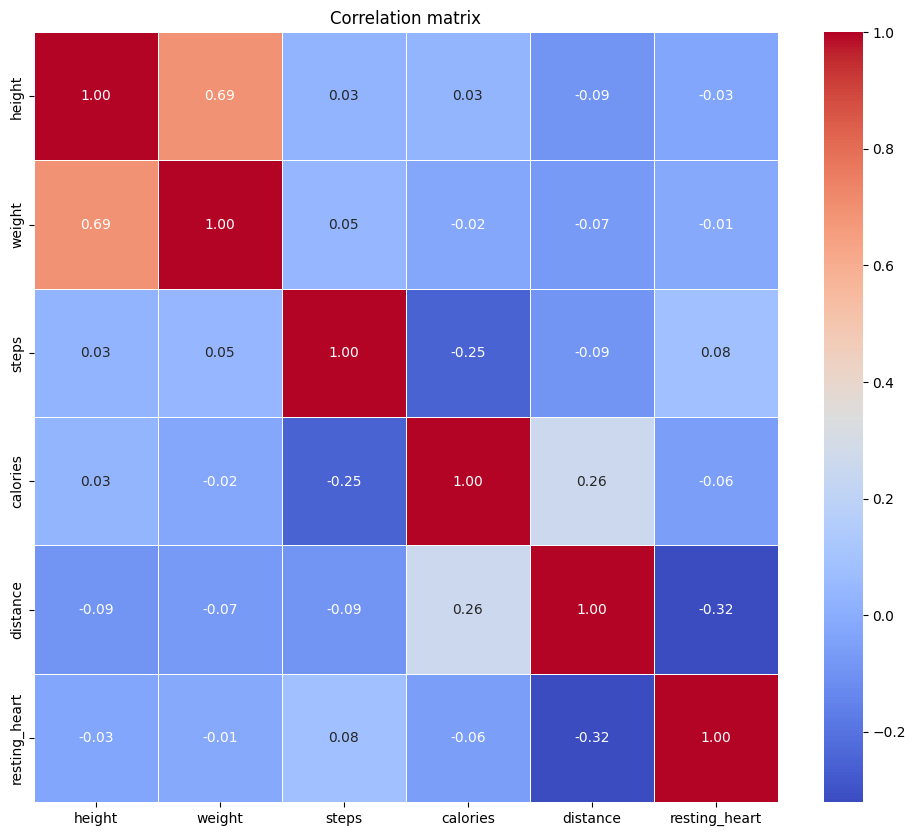

In [52]:
# Calculate correlation matrix
correlation_matrix = df_num.corr()

plt.figure(figsize=(12, 10))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation matrix")
plt.show()

<Axes: ylabel='count'>

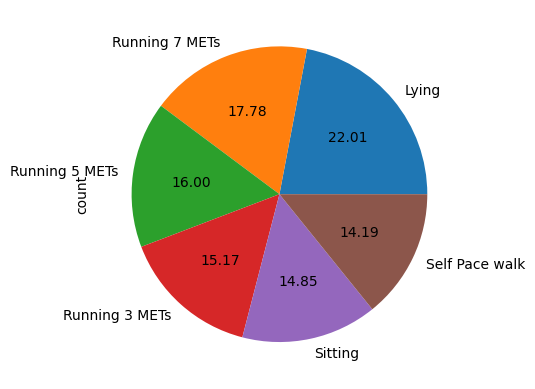

In [43]:
df['activity'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: xlabel='device'>

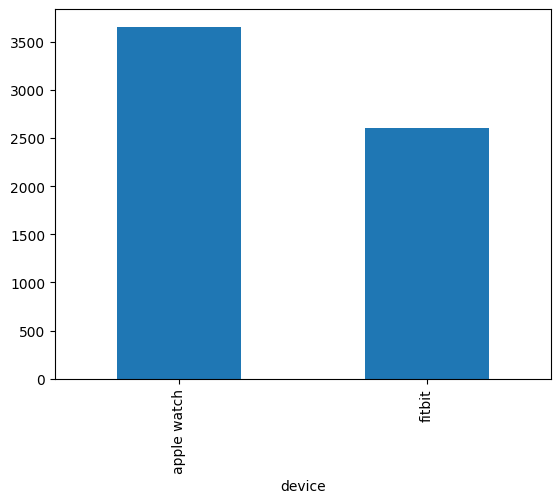

In [44]:
df['device'].value_counts().plot(kind='bar')

<Axes: xlabel='activity'>

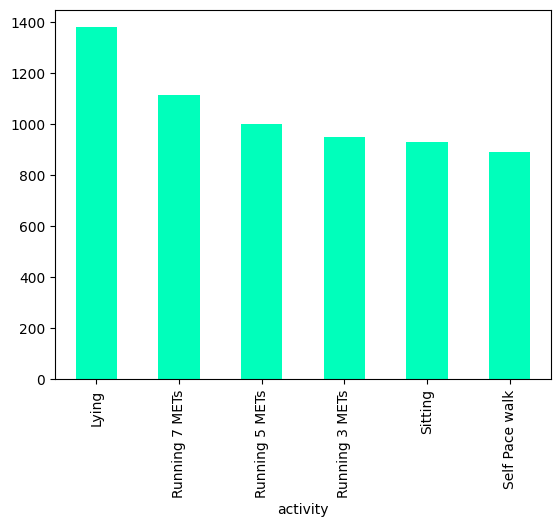

In [47]:
df['activity'].value_counts().plot(kind='bar', color= '#00FFBB')